<a href="https://colab.research.google.com/github/kreshuklab/teaching-dl-course-2019/blob/master/Webinars/exercise1/ReadingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading and saving data for a classification model
In this notebook, we first will read images and their corresponding labels and then will wrap and save them in a single file on disk (or google drive). It helps us a lot later to avoid reading so much data each time when we are working with our models.
We will use the python pickle module to wrap images in a single file. Any object in Python can be pickled so that it can be saved on disk. 
Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

# **Import necessary Libraries**

In [1]:
import numpy as np   # Package for scientific computing
import matplotlib.pyplot as plt # 2D plotting library
import os     # Using operating system
# NOTE: in the tutorials we used cv2 for reading images and resizing.
# we replaced this with imageio.imread and skimage.transform.resize
# because opencv can cause some dependency issues
#from imageio import imread
#from skimage.transform import resize
import cv2    # Computer vision and machine learning software library
from tqdm import tqdm   # Progress bar library
import random  # Generating Random Numbers
import pickle # Serializing and de-serializing a Python object structure
from os.path import join as pj # for path ops

# **Make a connection between colab and your google drive Where your data are saved.**

In [6]:
# Not needed since I run it on local machine
"""
from google.colab import drive
root = '/content/gdrive/'
drive.mount( root )
"""
root = './'

In [7]:
# create permanent directory in gdrive
cifar_dir_path = r'drive_ml/2020_ml_school/02_cifar/'
os.makedirs(cifar_dir_path, exist_ok=True)
os.listdir(root+cifar_dir_path)

[]

# **Reading and saving data** 
What we need is a training data directory (and/or validation data directory)  containing one subdirectory per image class, filled with images. For example: 

```
Animals/
    train/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
```



If you don't have your own data now, you could use the [cifar10](https://www.cs.toronto.edu/~kriz/cifar.html). For this you would have to run the following cell:

In [8]:

#!pip install cifar2png
!cifar2png cifar10 cifar10 #here non-persistent directory will be used to download data (it is first parameter of cifar2png binary)

cifar-10-python.tar.gz does not exists.
167kKB [00:10, 16.1kKB/s]                                                       
Saving test images: 100%|████████████████| 10000/10000 [00:10<00:00, 983.89it/s]


In [9]:
# DATADIR = cifar_dir_path   # You have to replace the directory of you images instead of "PathToYourDirectory".
                                                        # For example "/content/gdrive/My Drive/Animals/train"
DATADIR = "cifar10/train"     # for people working on cifar the data is stored locally

CATEGORIES = os.listdir(DATADIR)
print(CATEGORIES)

['frog', 'airplane', 'horse', 'truck', 'cat', 'deer', 'automobile', 'dog', 'bird', 'ship']


In [10]:
training_data = []
IMG_SIZE_H=32 # you need to set up a numerical value here. Useful to resize to normalize data size
IMG_SIZE_W=32 # you need to set up a numerical value here. Useful to resize to normalize data size
def create_training_data():
    for category in CATEGORIES:  # do plants and weeds

        path = os.path.join(DATADIR,category)  # create path to plants and weeds
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=plants 1=weeds

        for img in tqdm(os.listdir(path)):  # iterate over each image per plants and weeds
        
            img_array = cv2.imread(os.path.join(path,img))  # convert to array 
            new_array = cv2.resize(img_array, (IMG_SIZE_H, IMG_SIZE_W))  # resize to normalize data size
            training_data.append([new_array, class_num])  # add this to our training_data

In [11]:
create_training_data()  # Calling the function for reading images and labels
print(len(training_data)) # Printing the size of the database

100%|██████████| 5000/5000 [00:01<00:00, 3222.04it/s]

50000


# **Preparation of data for deeplearning**

In [12]:
random.shuffle(training_data)   # Shuffling data 
X = []  # An Array for images
y = []  # An Array for labels

for features,label in training_data:   # Seperation of iamegs and labels
    X.append(features)
    y.append(label)
print(np.array(X).shape) # Print the size of the database

(50000, 32, 32, 3)


In [13]:
X = np.array(X).reshape(-1, IMG_SIZE_H, IMG_SIZE_W, 3)  # Reshape data in a form that is suitable for keras
print(X.shape) # Print the size of the database

(50000, 32, 32, 3)


# **Visualisation and Saving**

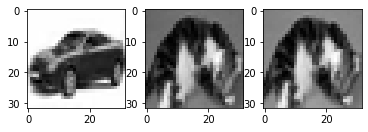

In [14]:
# plot 3 images as gray scale
plt.subplot(131)
plt.imshow(X[0,:,:,0], cmap=plt.get_cmap('gray'))
plt.subplot(132)
plt.imshow(X[1,:,:,0], cmap=plt.get_cmap('gray'))
plt.subplot(133)
plt.imshow(X[1,:,:,1], cmap=plt.get_cmap('gray')) #CIFAR data contains 3 channels, here we display 2nd channel for 1st image
# show the plot
plt.show()

In [15]:
fn_X = "X.pickle"
fn_Y = "Y.pickle"

pickle_out = open(root+cifar_dir_path+fn_X,"wb") # wrapping up images # You have to replace the directory of you images instead of "PathToSaveTheFile".
                                                        # For example "/content/gdrive/My Drive/MyFolder/X.pickle"
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open(root+cifar_dir_path+fn_Y,"wb") # wrapping up labels # You have to replace the directory of you images instead of "PathToSaveTheFile".
                                                        # For example "/content/gdrive/My Drive/MyFolder/y.pickle"
pickle.dump(y, pickle_out)
pickle_out.close()

In [17]:
!ls cifar10

test  train
